# Sentiment Analysis Using Vader

Explores Vader, and does sentiment analysis.  
Explores sentiment by source before clustering.  
Explores sentiment on crude topic identifications.  

References  
Implementaiton for vaderSentiment  
see https://vadersentiment.readthedocs.io/en/latest/index.html

Discussion of vader in the context of other models:  
https://medium.com/swlh/we-need-to-talk-about-sentiment-analysis-9d1f20f2ebfb 


Preprocessing Notes:  
For sentiment analysis, using uncleaned version of data. We want to leave text close to its original form: no lowercaseing everything, no lemmatizing, etc.   
See https://towardsdatascience.com/are-you-scared-vader-understanding-how-nlp-pre-processing-impacts-vader-scoring-4f4edadbc91d 

In [1]:
#import json
import pandas as pd
from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import nltk
#nltk.download('vader_lexicon')
import re
import regex
import matplotlib.pyplot as plt

## Implementing Vader


 

They recommend doning sentiment analysis at the sentence level. 

For multi sentence statement, break apart into sentences with a tokenizer and average scores of the sentences to get overall sentiment.
https://github.com/cjhutto/vaderSentiment/blob/94fbd74594ac0714dfc0e55bd7415994b24020cf/vaderSentiment/vaderSentiment.py#L607

In [221]:
# sentence_list = tokenize.sent_tokenize(paragraph)
# paragraphSentiments = 0.0
# for sentence in sentence_list:
#     vs = analyzer.polarity_scores(sentence)
#     print("{:-<69} {}".format(sentence, str(vs["compound"])))
#     paragraphSentiments += vs["compound"]
# print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
# print("----------------------------------------------------")

## Read in Data

In [6]:
df = pd.read_csv('../data/2020articles_cleaned_forsentiment.csv')

In [25]:
analyzer = SentimentIntensityAnalyzer()

#if running on small subset of data, uncomment the prints to individual sentiments assigned to sentences

def calculate_average_sentiment(paragraph):
    '''
    claculates sentiment using (VADER) on a corpus of data by averaging sentiments of sentences
    '''
    sentence_list = tokenize.sent_tokenize(paragraph)
    #print(len(sentence_list),sentence_list)
    paragraph_sentiments = 0.0
    for sentence in sentence_list:

        vs = analyzer.polarity_scores(sentence)
        #print("{:-<69} {}".format(sentence, str(vs["compound"])))
        paragraph_sentiments += vs["compound"]

    
    # the average sentiment 
    average_sentiment = paragraph_sentiments / len(sentence_list)
    #print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraph_sentiments / len(sentence_list), 4)))
    
    return round(average_sentiment, 4)




### Testing

In [24]:
#test_text = "what a tragedy! In tragic news,  Naomi Osaka withdraws from French Open to focus on mental health"

test_text = "Naomi Osaka withdraws from French Open to focus on mental health"
test_text = "U.S. Steelworkers Get Largest Wage Hike in Years with Trumps Tariffs-"
#test_text = "Sarah Huckabee Sanders Bans The Term Latinx From Official Government Use. was this appropriate?"

#test_text=  "President Trump on Tuesday evening blasted Congress over the already-passed COVID-19 relief package and called on both chambers to send him a new bill increasing stimulus checks from $600 to $2,000. The president expressed dismay with the $2.3 trillion package that Congress passed Monday, which includes $900 billion in coronavirus relief and $1.4 trillion to fund the government until October, conflating the two bills and saying the spending goals were misguided. A few months ago, Congress started negotiation"
#
calculate_average_sentiment(test_text)

0.0

In [14]:
pd.set_option('display.max_colwidth', None)
df.loc[0:10,'title']



0                                                  Trump shifts tone, says hes proud of Fed amid coronavirus turmoil
1                                       Iran paid bounties for targeting US troops, intelligence reportedly suggests
2                                                          US forces rescue American citizen held hostage in Nigeria
3                                              Trump slams relief bill, calls on Congress to increase stimulus money
4                                                   Naomi Osaka withdraws from French Open to focus on mental health
5                                               U.S. Steelworkers Get Largest Wage Hike in Years with Trumps Tariffs
6                                                West Virginia Gov. Jim Justice Endorses Trump For President In 2024
7                                        Court Sides With Catholic School That Let Employee Go Over Her Gay Marriage
8     ACLU Asks New Acting ICE Chief To Close Detention Centers,

testing for not identifiable unicode characters.  
unicodes characters didn not end up causing any issues with vader

In [123]:

# def unicode_code_points(text):
#     return ' '.join([f"U+{ord(char):04X}" for char in text])

# # Iterate through each cell in the DataFrame and print Unicode representations
# for index, row in df[19:20].iterrows():
#     unicode_points = unicode_code_points(row['title'])
#     print(f"Row index: {index}, Unicode code points: {unicode_points}")


In [21]:
# calcualteing the sentiment
df['average_sentiment_title'] = df['title'].apply(calculate_average_sentiment)
df['average_sentiment_text'] = df['article_text'].apply(calculate_average_sentiment)
df['average_sentiment_text_full'] = df['full_article_text'].apply(calculate_average_sentiment)
df['average_sentiment_title_text'] = df['title_text'].apply(calculate_average_sentiment)

## Crude topic sentiment analysis

In [227]:
#test = df.loc[df['source'] == "breitbart", :]
#test

In [29]:
#crude topic identification

keywords = ['Trump', 'Biden', 'George Floyd', 'wildfires', 'covid-19|pandemic']

# Create an empty dictionary to store subsets of the DataFrame
topic_subsets = {}

# Iterate over each keyword
for keyword in keywords:
    mask = df['title'].str.contains(keyword, case=False, regex=True)
    #print(keyword, df['title'], mask)
    topic_subsets[keyword] = df[mask]
    #print("len",len(topic_subsets[keyword]))

topic_subsets['all articles'] = df

# Add and all articles group
keywords.append('all articles')
print(keywords)





['Trump', 'Biden', 'George Floyd', 'wildfires', 'covid-19|pandemic', 'all articles']


In [38]:
def classify_sentiment(text):
    '''
    Categorize sentiment compound scores from VADER into a 1-5 category.
    1 is very negative, 5 is very positive, 0 is neutral.  
    '''
    
    if text >= 0.5:
      return 5
    elif text >= 0.3:
      return 4
    elif text <= -0.5:
      return 2
    elif text <= -0.3:
      return 1
    else:
      return 3



df['average_sentiment_text_category'] = df['average_sentiment_text'].apply(classify_sentiment)

In [39]:
topic_subsets.keys()


dict_keys(['Trump', 'Biden', 'George Floyd', 'wildfires', 'covid-19|pandemic', 'all articles'])

## Produce distributions of sentiment   
Distributions by:  
(1) source  
(2) title + text(512 characters) + text(full) + title concatenated with text  
(3) crude topic identidication  

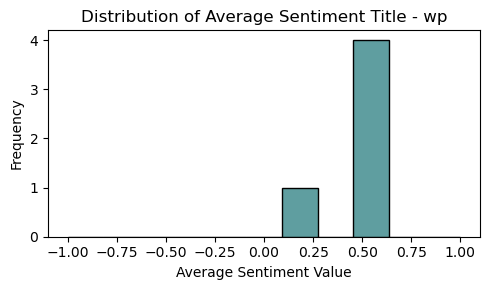

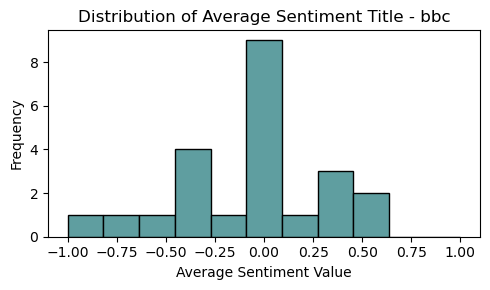

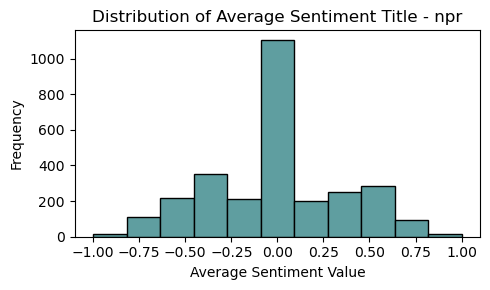

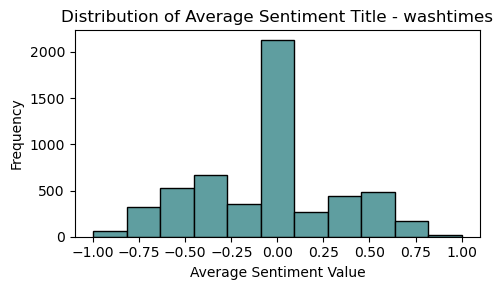

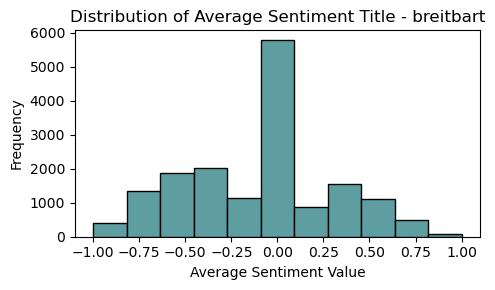

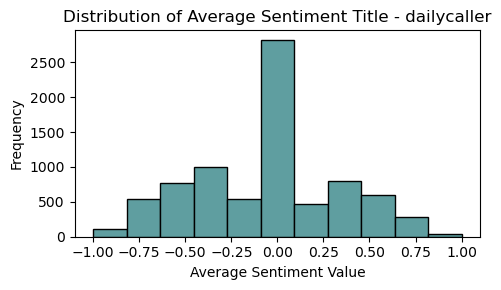

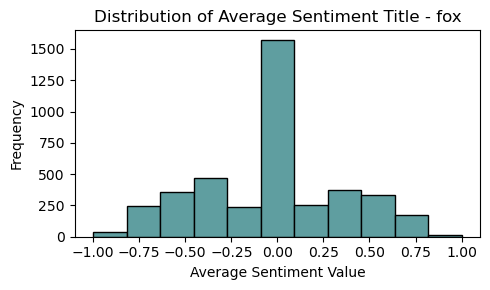

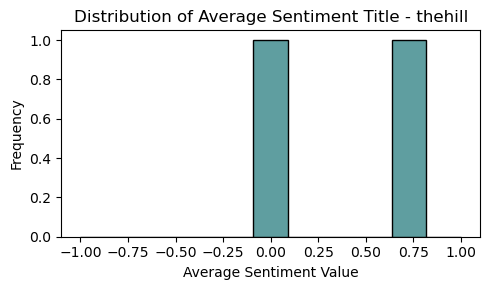

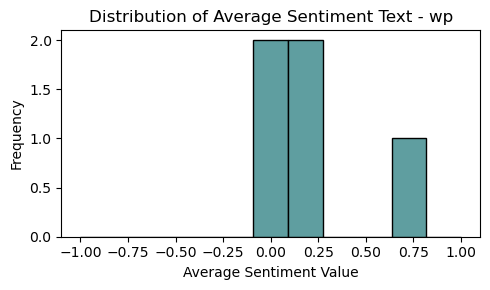

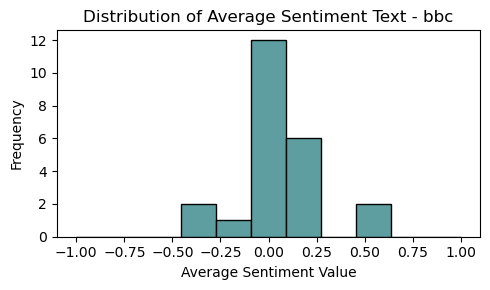

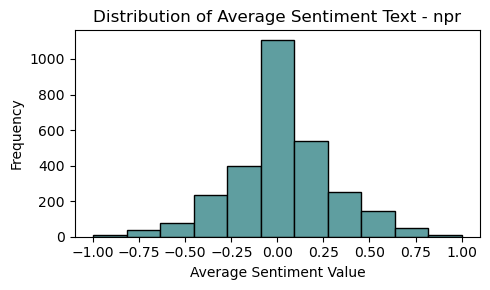

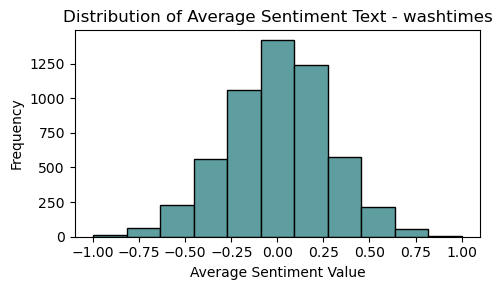

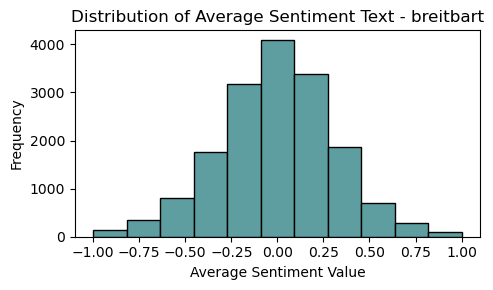

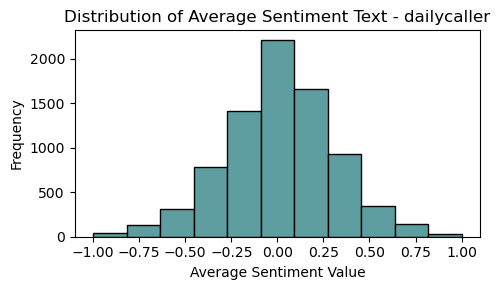

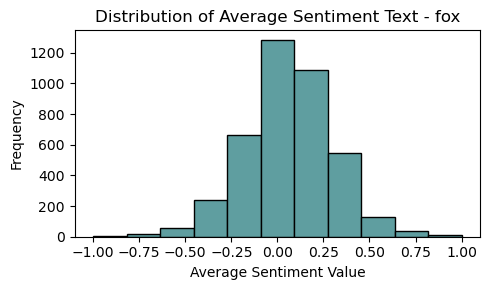

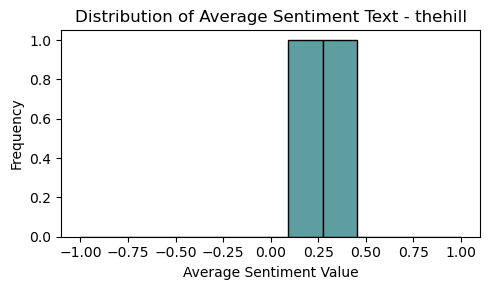

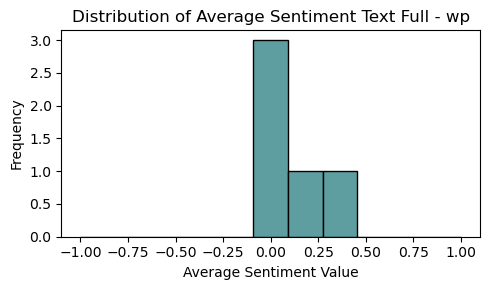

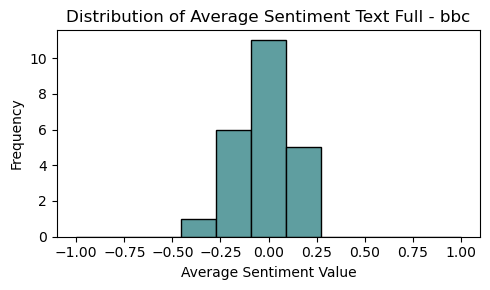

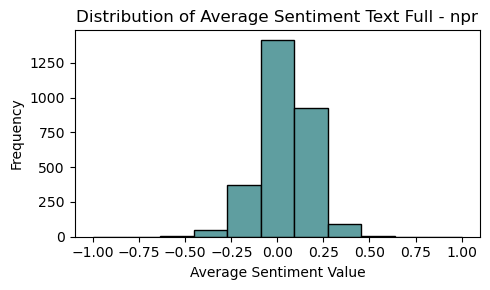

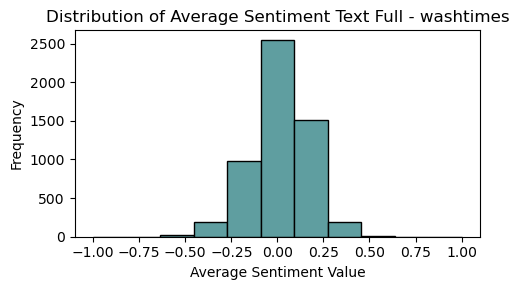

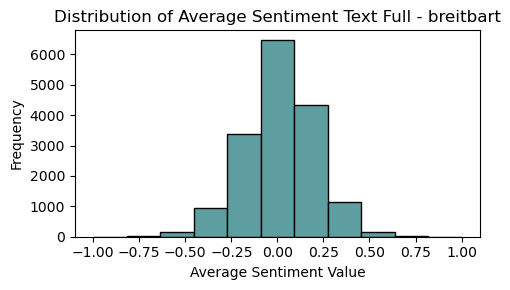

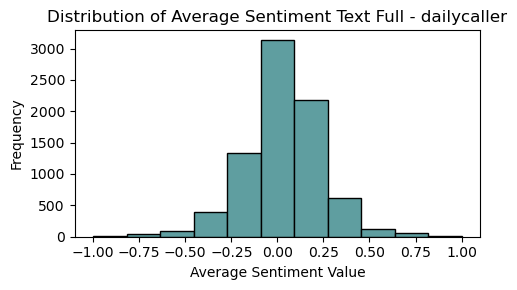

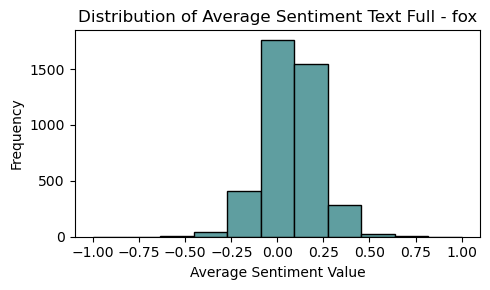

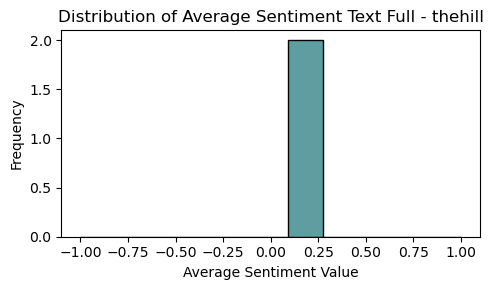

In [52]:
keywords = ['all articles']
for topic in keywords:

    for data_type in ['average_sentiment_title','average_sentiment_text','average_sentiment_text_full']:
    #for data_type in ['average_sentiment_text_category']:
        for source in ['wp','bbc','npr', 'washtimes', 'breitbart', 'dailycaller','fox','thehill']:
            subset = topic_subsets[topic]    
            subset_source = subset[subset['source'] == source]  
            
            #comment below out to see across all topics
            #Uncomment to produce a large plot per datatype source topic

            #subset_source  = subset
            
            
            plt.figure(figsize=(5, 3))
            plt.hist(subset_source[data_type], bins=11, color='cadetblue', range=(-1, 1), edgecolor='black')
            plt.xlabel('Average Sentiment Value')
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {data_type.replace("_", " ").title()} - {source}')
            #plt.title(f'Distribution of {data_type.replace("_", " ").title()} for {topic.title()} Articles - {source}')
            plt.grid(True)
            plt.grid(False)
            plt.tight_layout()
            plt.show()
        



## Make large exploratory plot with all distributions viewable together

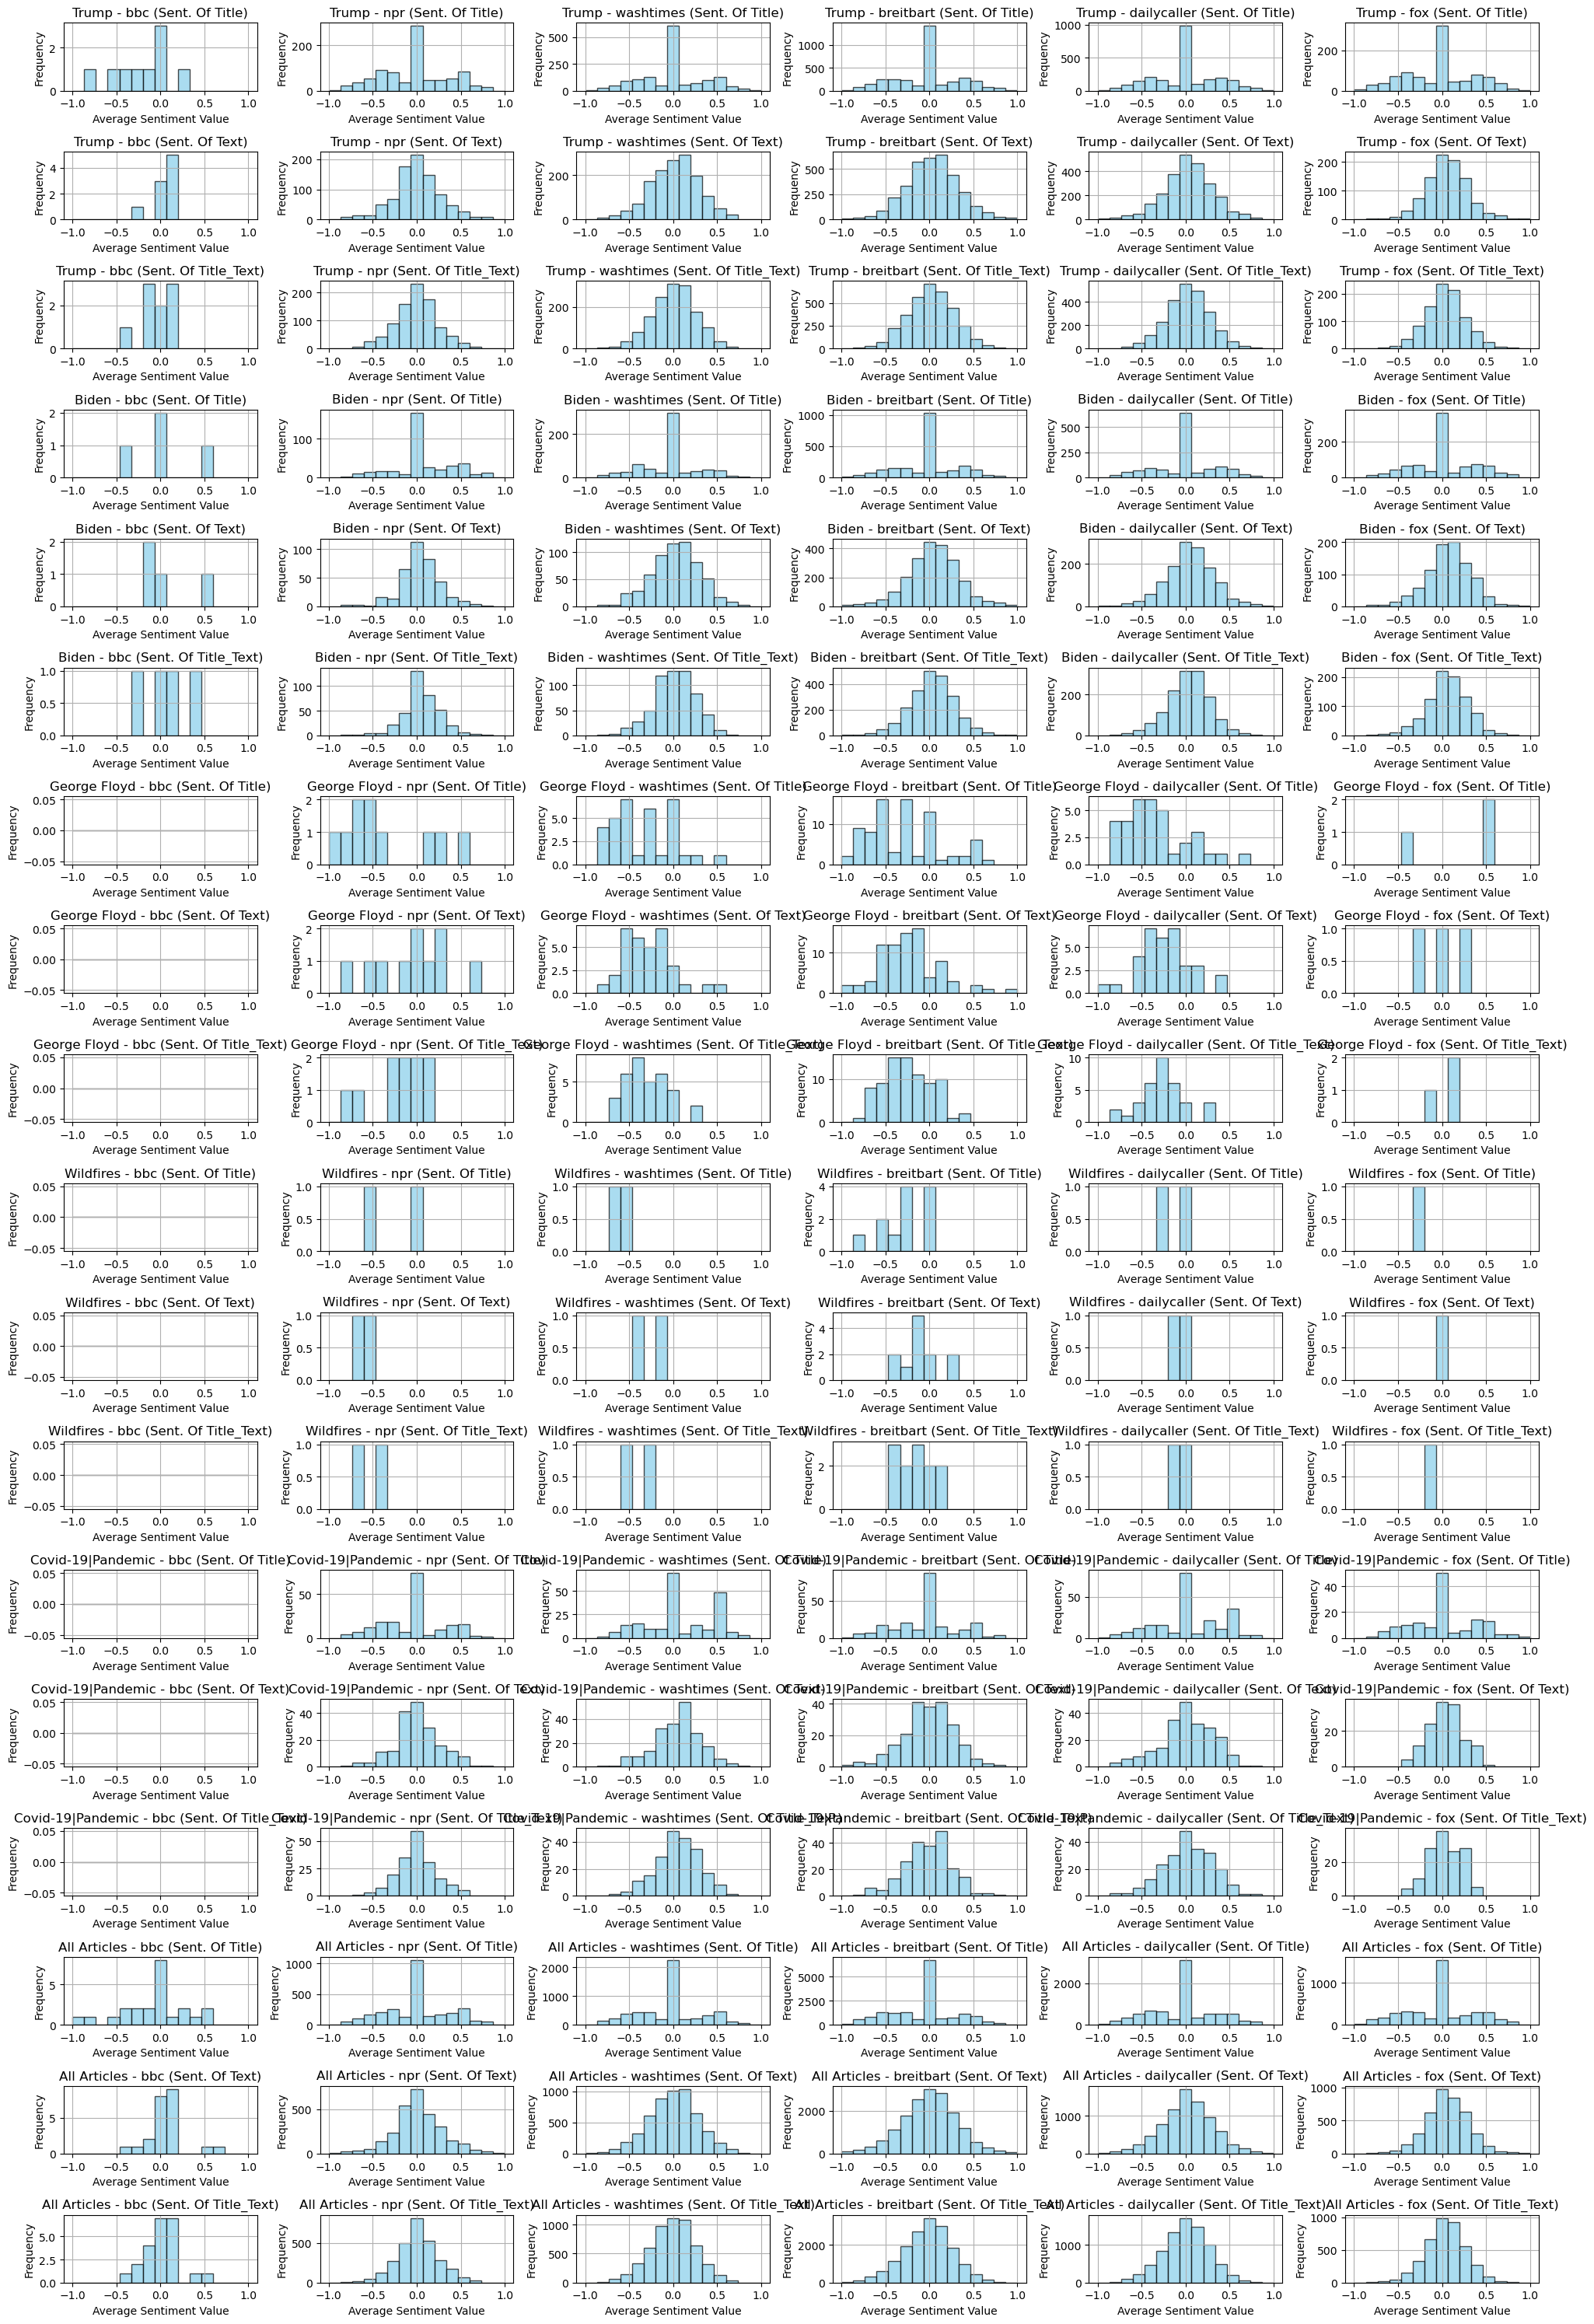

In [267]:

num_rows = len(keywords)
#num_cols = len(['wp', 'bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox', 'thehill'])
num_cols = len(['bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox'])

fig, axes = plt.subplots(num_rows * 3, num_cols, figsize=(20, 30))

for i, topic in enumerate(keywords):

    for j, source in enumerate(['bbc', 'npr', 'washtimes', 'breitbart', 'dailycaller', 'fox']):

        axes_title = axes[i*3, j] if num_rows > 1 else axes[j]
        axes_text = axes[i*3+1, j] if num_rows > 1 else axes[j]
        axes_title_text = axes[i*3+2, j] if num_rows > 1 else axes[j]

        for k, data_type in enumerate(['average_sentiment_title', 'average_sentiment_text', 'average_sentiment_title_text']):
            subset = topic_subsets[topic]
            subset_source = subset[subset['source'] == source]
            ax = [axes_title, axes_text, axes_title_text][k]

            # Plot histogram
            ax.hist(subset_source[data_type], bins=15, range=(-1, 1), color='cadetblue', edgecolor='black', alpha=0.7)
            

            ax.set_xlabel('Average Sentiment Value')
            ax.set_ylabel('Frequency')
            #ax.set_title(f'{topic.title()} - {source} ({data_type.replace("_", " ").title()})')
            ax.set_title(f'{topic.title()} - {source} ({data_type.replace("average_sentiment_", "Sent. of ").title()})')
            ax.grid(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [259]:
topic_subsets['all articles']['average_sentiment_text']

0       -0.0031
1        0.1497
2        0.7189
3        0.2633
4        0.3185
          ...  
37039    0.4721
37040   -0.0593
37041   -0.0890
37042   -0.0593
37043   -0.0593
Name: average_sentiment_text, Length: 37035, dtype: float64

In [270]:
##average by news source

def assign_sentiment_label(score):
    """
    sentiment categorizations with positive negative neutral designations
    """

    if score >= 0.5:
        return 'positive'
    elif score <= -0.5:
        return 'negative'
    else:
        return 'neutral'

#summary = df.groupby('source')['average_sentiment'].mean()
keywords = ['all articles']
for topic in keywords:

    #print(type(topic), topic)
    for data_type in ['average_sentiment_title','average_sentiment_text','average_sentiment_title_text']:
        summary = topic_subsets[topic].groupby('source').agg({data_type: 'mean', 'source': 'count'}).rename(columns={'source': 'observations'}).sort_values(data_type)


        # Apply the function to create a new column 'sentiment_label'
        summary['sentiment_label'] = summary[data_type].apply(assign_sentiment_label)
        print(topic, data_type)
        print(summary)



all articles average_sentiment_title
             average_sentiment_title  observations sentiment_label
source                                                            
bbc                        -0.073300            23         neutral
breitbart                  -0.066545         16641         neutral
washtimes                  -0.040099          5441         neutral
dailycaller                -0.031494          7996         neutral
fox                        -0.026125          4069         neutral
npr                        -0.004854          2858         neutral
wp                          0.326120             5         neutral
thehill                     0.329850             2         neutral
all articles average_sentiment_text
             average_sentiment_text  observations sentiment_label
source                                                           
breitbart                 -0.001952         16641         neutral
washtimes                  0.006166          5441         n